# Basis of Corpus

A series of basic natural language processing (NLP) steps in Spanish are performed, applied to a corpus of tweets. 

In [ ]:
#Usar nltk en un notebook
import nltk
#nltk.download('punkt')

from nltk.tokenize import TweetTokenizer


# First way to create a Corpus

In [14]:
import nltk
#nltk.download('punkt')
from nltk.tokenize import TweetTokenizer
def get_texts_from_file(path_corpus,path_thruth):
    """
    Reads a corpus and its correspondig labels from files.
    Args:
        path_corpus (.txt): Path to the corpus file.
        path_thruth (.txt): Path to the labels file.
    Returns:
        tr_txt (list): List of tweets from the corpus.
        tr_y (list): List of labels corresponding to the tweets.
    """
    tr_txt=[]
    tr_y=[]    
    with open(path_corpus, 'r') as f_corpus, open(path_thruth, 'r') as f_thruth:
        for twitt in f_corpus:
            tr_txt.append(twitt) 
        for label in f_thruth:
            tr_y.append(int(label)) 
    return tr_txt,tr_y
tr_txt,tr_y=get_texts_from_file('./mex20_train.txt','./mex20_train_labels.txt')
tokenizer=TweetTokenizer()
tokens = [token for doc in tr_txt for token in tokenizer.tokenize(doc)] #create a list of tokens from the corpus

# Regular Expressions
Now that a corpus has been created, it can do some basic things like search for words, replace tokens and more.

In [15]:
import re

for i in range(len(tr_txt)):
    word1=re.findall("hola",tr_txt[i]) #find all the words "hola" 
    if word1:
        print(f"Found 'hola' in tweet {i+1}:")

Found 'hola' in tweet 392:
Found 'hola' in tweet 806:
Found 'hola' in tweet 1777:
Found 'hola' in tweet 2445:
Found 'hola' in tweet 3621:
Found 'hola' in tweet 4658:
Found 'hola' in tweet 5109:


In [16]:
for tweet in tr_txt[-3:]:  
    print(re.split(r'[.!?]+', tweet.strip())) #Divide the tweet into sentences (only the first 3 tweets)


['Las alitas de wings army ahora me supieron feas 😐']
['Me duele la cabeza, me duele el corazón, chingas a tu madre si tocas otra canción', '']
['ToysRUs es uno de los negocios peor llevados en EEUU', ' Tiendas feas, viejas y caras', '']


In [17]:
word2 = [re.sub(r'si', '              ', tweet) for tweet in tr_txt] #Replace pattern:si with empty string
for tweet in word2[-3:]:                                             #print the last 3 tweets with the pattern replaced
    print(tweet.strip())                                             #print the tweet without leading and trailing spaces


Las alitas de wings army ahora me supieron feas 😐
Me duele la cabeza, me duele el corazón, chingas a tu madre                tocas otra canción.
ToysRUs es uno de los negocios peor llevados en EEUU. Tiendas feas, viejas y caras.


# A smarter way to create a corpus 

Is by RegexpTokenizer helps clean and tokenize the text in one step.

In [27]:
from nltk.tokenize import RegexpTokenizer
import nltk

tokenizer = RegexpTokenizer(r'\w+') 
corpus = ' '.join(tr_txt)
tokens_regexp = tokenizer.tokenize(corpus) #tokekize the corpus using RegexpTokenizer
text_nltk = nltk.Text(tokens_regexp)       #make a text object from the tokens

print(f"Number of tokens: {len(tokens_regexp)}")
print(f"Number of unique tokens: {len(set(tokens_regexp))}")
print(f"Number of sentences: {len(nltk.sent_tokenize(corpus))}")

Number of tokens: 84627
Number of unique tokens: 14627
Number of sentences: 3980


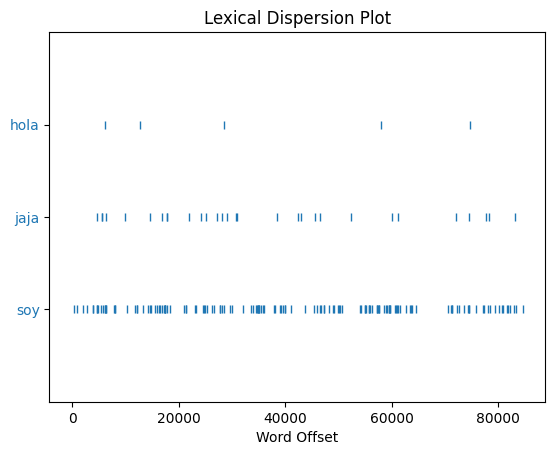

In [19]:
from nltk.tokenize import RegexpTokenizer
from nltk import Text
import matplotlib.pyplot as plt
with open('./mex20_train.txt', 'r', encoding='utf-8') as f:
    raw_text = f.read()

tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(raw_text)
corpus_text = Text(tokens)
special_words = ["hola", "jaja", "soy"]       #List of special words to highlight in the plot
corpus_text.dispersion_plot(special_words)    
plt.show()


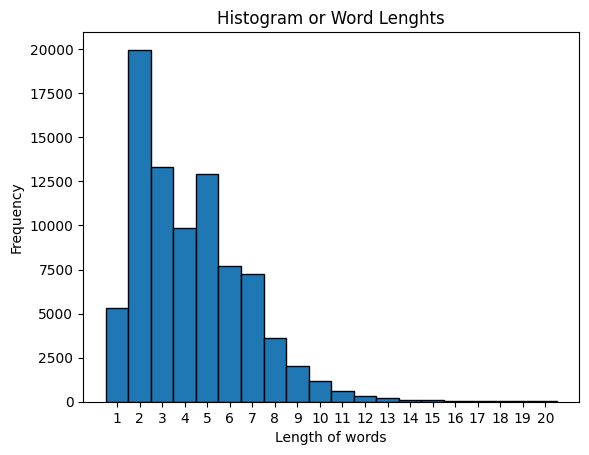

In [24]:
import matplotlib.pyplot as plt

longs = [len(palabra) for palabra in tokens]  #Calculate the length of each word in the corpus# Definir límite máximo de longitud a mostrar
max_len = 20
longs_filtradas = [l for l in longs if l <= max_len] 

# Histogram of lenfths of words
plt.hist(longs_filtradas, bins=range(1, max_len + 2), edgecolor='black', align='left')
plt.title('Histogram or Word Lenghts')
plt.xlabel('Length of words')
plt.ylabel('Frequency')
plt.xticks(range(1, max_len + 1))  
plt.show()


In [25]:
from nltk.corpus import stopwords   #A stopword is a word that is filtered out before or after processing of text.
from collections import Counter
stopwords_es = set(stopwords.words('spanish'))
words_sin_stopword = [palabra for palabra in tokens if palabra.lower() not in stopwords_es]
frecuencia_sin_stopwords = Counter(words_sin_stopword)
top10_sstpw = frecuencia_sin_stopwords.most_common(5)

print("Top 5 words without sopwords:")
for palabra, freq in top10_sstpw:
    print(f"{palabra}: {freq}")

Top 5 words wothout sopwords:
USUARIO: 1401
verga: 696
madre: 666
putas: 500
putos: 465
